In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pandas as pd
import joblib
import os

file_name = "../data/heart.csv"

if not os.path.exists(file_name):
    raise FileNotFoundError("File not found.Please check")
df = pd.read_csv(file_name)
df = df.dropna()

label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop("HeartDisease",axis=1)
y = df["HeartDisease"] * 100

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler_file = "../models/heart_scaler.pkl"

if os.path.exists(scaler_file):
    raise FileExistsError("File already exist.")
else:
    joblib.dump(scaler,scaler_file)


pd.DataFrame(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [2]:
X_Train,X_Test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = SVR()
model.fit(X_Train,y_train)
file_name_pkl = "../models/heart_model.pkl"
if os.path.exists(file_name_pkl):
    raise FileExistsError("File already exist")
else:
    joblib.dump(model,file_name_pkl)
    print("File created successfully")

File created successfully


In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
pred = model.predict(X_Test)

mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE  : 27.57
MSE  : 1219.92
RMSE : 34.93
R² Score: 0.50


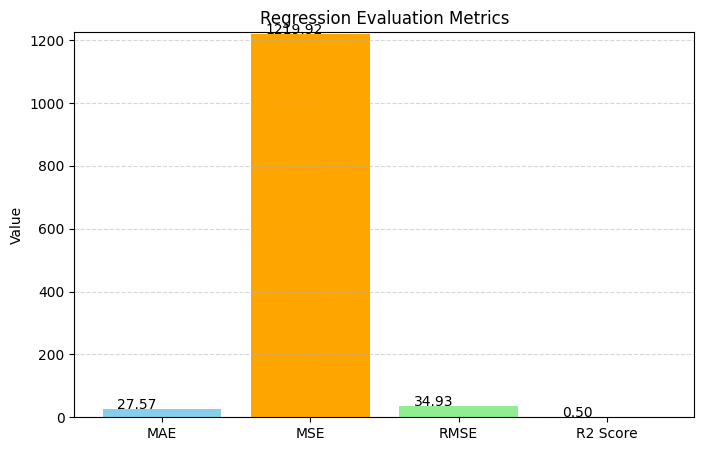

In [4]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']
values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + 0.02, f"{yval:.2f}")

plt.title("Regression Evaluation Metrics")
plt.ylabel("Value")
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()